# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



Load in the "states_edu.csv" dataset and take a look at the head of the data

In [15]:
import pandas as pd
df = pd.read_csv('states_edu.csv')
response_variable = 'AVG_MATH_4_SCORE'
# Convert relevant columns to numeric values, forcibly converting errors to NaNs
df[response_variable] = pd.to_numeric(df[response_variable], errors='coerce')
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
# Display the first few rows to understand the structure and content of the data
print(hm.head())


       PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   ...  GRADES_4_G  GRADES_8_G  GRADES_12_G 

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset? 

In [20]:
# Check unique years in the dataset
years_logged = df['YEAR']
# Print the unique years and the number of unique years
print("Years logged in the dataset:", years_logged)
print("Number of unique years:", len(years_logged))


Years logged in the dataset: 0       1992
1       1992
2       1992
3       1992
4       1992
        ... 
1710    2019
1711    2019
1712    2019
1713    2019
1714    2019
Name: YEAR, Length: 1715, dtype: int64
Number of unique years: 1715


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [21]:
# Filter the dataset for Michigan and Ohio
michigan_data = df[df['STATE'] == 'MICHIGAN']
ohio_data = df[df['STATE'] == 'OHIO']
# Calculate the average score for each state
michigan_avg_score = michigan_data[response_variable].mean()
ohio_avg_score = ohio_data[response_variable].mean()
print(f"Average Grade 4 Math Score for Michigan: {michigan_avg_score:.2f}")
print(f"Average Grade 4 Math Score for Ohio: {ohio_avg_score:.2f}")


Average Grade 4 Math Score for Michigan: 234.36
Average Grade 4 Math Score for Ohio: 239.45


Find the average for your chosen test across all states in 2019

In [14]:
import pandas as pd
df = pd.read_csv('states_edu.csv')
response_variable = 'AVG_MATH_4_SCORE'
df[response_variable] = pd.to_numeric(df[response_variable], errors='coerce')
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')
# Filter the dataset for the year 2019
data_2019 = df[df['YEAR'] == 2019]
# Calculate the average score for all states in 2019
avg_score_2019 = data_2019[response_variable].mean()
# Print the average score as an integer
print(f"Average Grade 4 Math Score across all states in 2019: {int(avg_score_2019)}")

Average Grade 4 Math Score across all states in 2019: 239


For each state, find a maximum value for your chosen test score

In [25]:

# Group by state and find the maximum value for the chosen test score
max_scores_by_state = df.groupby('STATE')[response_variable].max().reset_index()
for index, row in max_scores_by_state.iterrows():
    print(f"State: {row['STATE']}, Max {response_variable}: {int(row[response_variable])}")


State: ALABAMA, Max AVG_MATH_4_SCORE: 233
State: ALASKA, Max AVG_MATH_4_SCORE: 237
State: ARIZONA, Max AVG_MATH_4_SCORE: 240
State: ARKANSAS, Max AVG_MATH_4_SCORE: 240
State: CALIFORNIA, Max AVG_MATH_4_SCORE: 235
State: COLORADO, Max AVG_MATH_4_SCORE: 247
State: CONNECTICUT, Max AVG_MATH_4_SCORE: 245
State: DELAWARE, Max AVG_MATH_4_SCORE: 243
State: DISTRICT_OF_COLUMBIA, Max AVG_MATH_4_SCORE: 235
State: DODEA, Max AVG_MATH_4_SCORE: 250
State: FLORIDA, Max AVG_MATH_4_SCORE: 246
State: GEORGIA, Max AVG_MATH_4_SCORE: 240
State: HAWAII, Max AVG_MATH_4_SCORE: 243
State: IDAHO, Max AVG_MATH_4_SCORE: 242
State: ILLINOIS, Max AVG_MATH_4_SCORE: 239
State: INDIANA, Max AVG_MATH_4_SCORE: 249
State: IOWA, Max AVG_MATH_4_SCORE: 246
State: KANSAS, Max AVG_MATH_4_SCORE: 248
State: KENTUCKY, Max AVG_MATH_4_SCORE: 242
State: LOUISIANA, Max AVG_MATH_4_SCORE: 234
State: MAINE, Max AVG_MATH_4_SCORE: 246
State: MARYLAND, Max AVG_MATH_4_SCORE: 247
State: MASSACHUSETTS, Max AVG_MATH_4_SCORE: 253
State: MICHI

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [26]:
import pandas as pd

df = pd.read_csv('states_edu.csv')
# Creating the expenditure_per_student feature
# Assuming we have TOTAL_EXPENDITURE and ENROLL columns in our dataset
df['EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL']
# Check for missing values in the newly created feature
print(f"Missing values in EXPENDITURE_PER_STUDENT: {df['EXPENDITURE_PER_STUDENT'].isna().sum()}")
# Display the first few rows to see the new feature
print(df[['STATE', 'YEAR', 'TOTAL_EXPENDITURE', 'ENROLL', 'EXPENDITURE_PER_STUDENT']].head())

Missing values in EXPENDITURE_PER_STUDENT: 491
        STATE  YEAR  TOTAL_EXPENDITURE  ENROLL  EXPENDITURE_PER_STUDENT
0     ALABAMA  1992          2653798.0     NaN                      NaN
1      ALASKA  1992           972488.0     NaN                      NaN
2     ARIZONA  1992          3401580.0     NaN                      NaN
3    ARKANSAS  1992          1743022.0     NaN                      NaN
4  CALIFORNIA  1992         27138832.0     NaN                      NaN


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

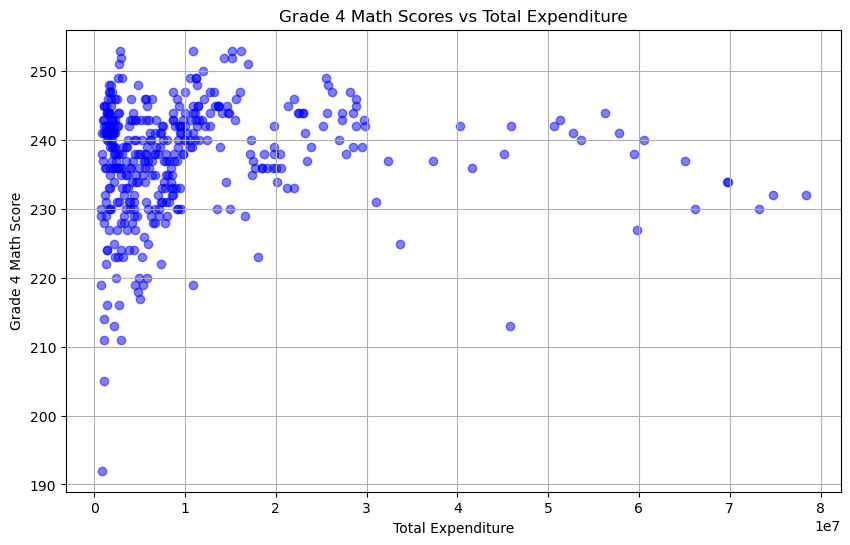

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter Plot of Grade 4 Math Scores vs Total Expenditure
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['TOTAL_EXPENDITURE'], df_cleaned['AVG_MATH_4_SCORE'], alpha=0.5, color='blue')
plt.title('Grade 4 Math Scores vs Total Expenditure')
plt.xlabel('Total Expenditure')
plt.ylabel('Grade 4 Math Score')
plt.grid(True)
plt.show()
#used gpt for help 


Grade 4 Math Scores vs Total Expenditure

**Visualization 2**

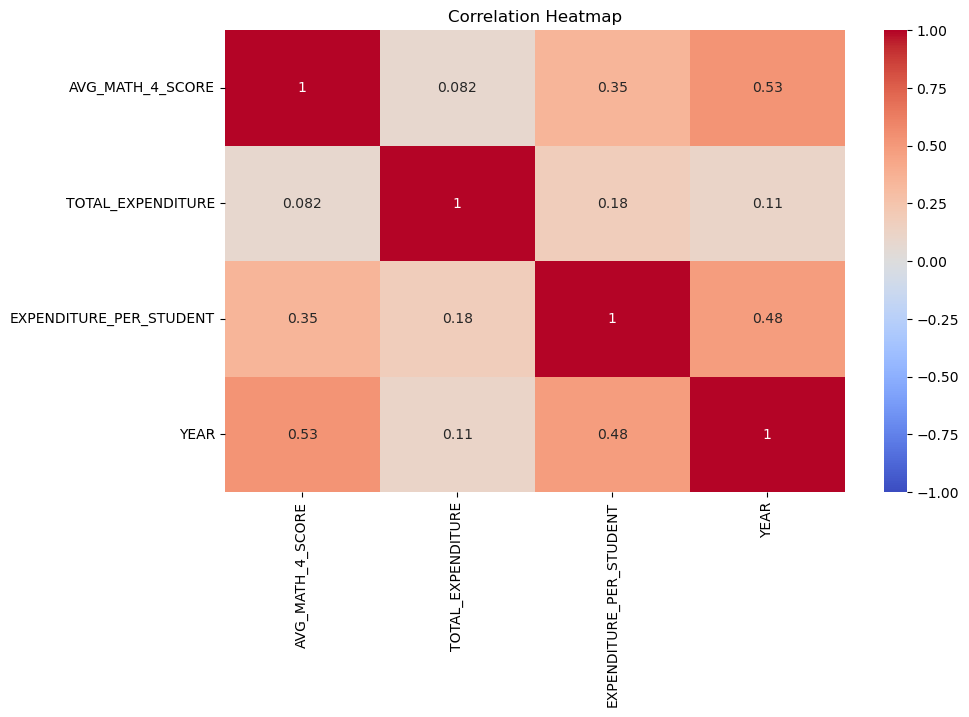

In [31]:


# Correlation Heatmap to show relationships between multiple features and the response variable
plt.figure(figsize=(10, 6))
correlation_matrix = df_cleaned[['AVG_MATH_4_SCORE', 'TOTAL_EXPENDITURE', 'EXPENDITURE_PER_STUDENT', 'YEAR']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()
#used got for help 

Correlation Heatmap

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [39]:
# Load the dataset
df = pd.read_csv('states_edu.csv')

# Creating the expenditure_per_student feature
df['EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['ENROLL']

# Ensure the numeric conversion and handle any potential issues
for col in ['AVG_MATH_4_SCORE', 'TOTAL_EXPENDITURE', 'ENROLL', 'EXPENDITURE_PER_STUDENT', 'YEAR']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing values in the response variable or key features
df_cleaned = df.dropna(subset=['AVG_MATH_4_SCORE', 'TOTAL_EXPENDITURE', 'ENROLL', 'EXPENDITURE_PER_STUDENT'])

# Verify there are no missing values left in the features and response variable
print(df_cleaned[['AVG_MATH_4_SCORE', 'TOTAL_EXPENDITURE', 'EXPENDITURE_PER_STUDENT', 'YEAR']].isna().sum())

AVG_MATH_4_SCORE           0
TOTAL_EXPENDITURE          0
EXPENDITURE_PER_STUDENT    0
YEAR                       0
dtype: int64


In [40]:
# Define the feature set and response variable
features = ['YEAR', 'TOTAL_EXPENDITURE', 'EXPENDITURE_PER_STUDENT']
response_variable = 'AVG_MATH_4_SCORE'
X = df_cleaned[features]
y = df_cleaned[response_variable]
# Verify data types to ensure there are no non-numeric entries
print(X.dtypes)
print(y.dtypes)
# Create training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

YEAR                         int64
TOTAL_EXPENDITURE          float64
EXPENDITURE_PER_STUDENT    float64
dtype: object
float64
Shape of X_train: (318, 3)
Shape of X_test: (80, 3)
Shape of y_train: (318,)
Shape of y_test: (80,)


<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [43]:
# Initialize the model
model = LinearRegression()
# Train the model using the training data
model.fit(X_train, y_train)
# Predict 
predictions = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Root Mean Squared Error: 7.39
R-squared: 0.34


In [ ]:
# create your model here
# model = did above 

In [44]:
model.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [47]:
# mean error
np.mean(model.predict(X_test)-y_test)
# mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))
# root mean squared error -- penalizes large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

7.389127565196038

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

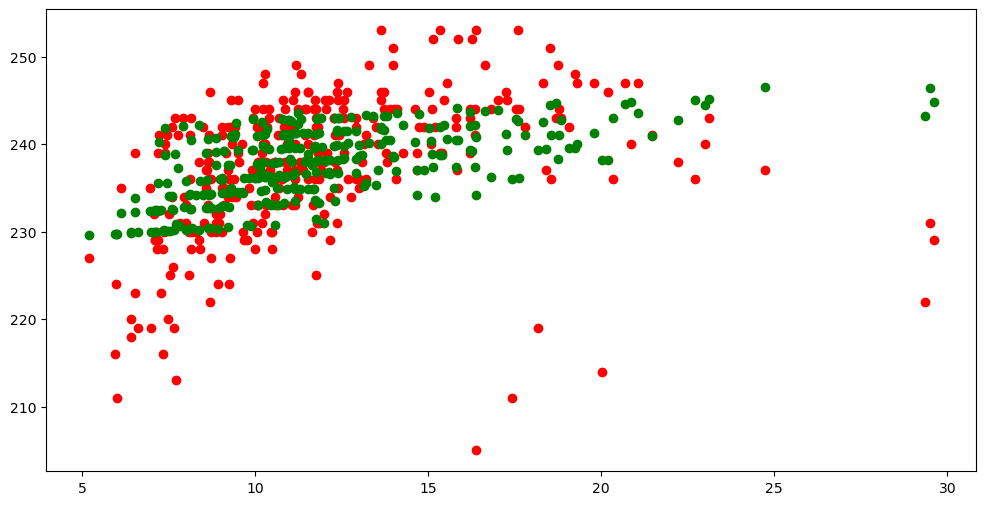

In [53]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
col_name = 'EXPENDITURE_PER_STUDENT'  # Choose the predictor you are interested in

f = plt.figure(figsize=(12, 6))
plt.scatter(X_train[col_name], y_train, color="red")
plt.scatter(X_train[col_name], model.predict(X_train), color="green")




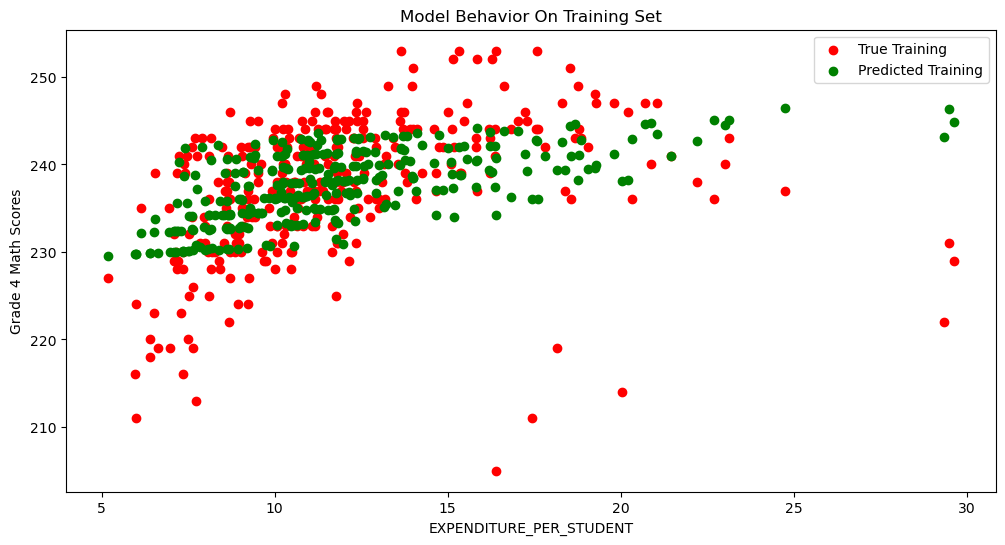

In [54]:

f = plt.figure(figsize=(12, 6))
plt.scatter(X_train[col_name], y_train, color="red")
plt.scatter(X_train[col_name], model.predict(X_train), color="green")

plt.legend(['True Training', 'Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Grade 4 Math Scores')
plt.title("Model Behavior On Training Set")
plt.show()
